In [117]:
import numpy as np
import pandas as pd

# loading data 

df = pd.read_csv("C:/National college/data analytic theory/project/Social_Network_Ads.csv")
dataset = df
pd.set_option("display.max.columns", None)
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


# data characteristics

In [118]:
# data population
total_records = len(df)
unique_records = len(df.drop_duplicates())

# here Data A􀆩ributes
num_arributes = len(df.columns)
arribute_names = list(df.columns)
print("total record",total_records)
print("unique record",unique_records)
print("num arributes ",num_arributes)
print("arribute names",arribute_names)

df.describe()
df.info()

total record 400
unique record 400
num arributes  5
arribute names ['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [119]:
# checking null values
df.isnull().sum().sum()

0

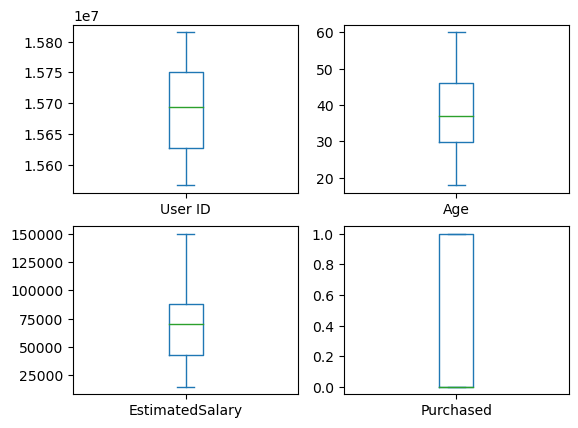

In [120]:
import matplotlib.pyplot as plt

import seaborn as sns
df.plot(kind="box", subplots=True, layout=(2,2))  
plt.show()


#  Train test split

In [121]:
df=df.iloc[:,2:]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Purchased', axis=1),
                                                    df['Purchased'],
                                                    test_size=0.3,
                                                    random_state=0)


X_train.shape, X_test.shape

((280, 2), (120, 2))

In [122]:
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


# Data Preprocessing Scaling.

In [123]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [124]:
scaler.mean_


array([3.78642857e+01, 6.98071429e+04])

In [125]:
X_train


,Age,EstimatedSalary
92,26,15000
223,60,102000
234,38,112000
232,40,107000
377,42,53000
...,...,...
323,48,30000
192,29,43000
117,36,52000
47,27,54000


In [126]:
X_train_scaled


array([[-1.1631724 , -1.5849703 ],
       [ 2.17018137,  0.93098672],
       [ 0.0133054 ,  1.22017719],
       [ 0.20938504,  1.07558195],
       [ 0.40546467, -0.48604654],
       [-0.28081405, -0.31253226],
       [ 0.99370357, -0.8330751 ],
       [ 0.99370357,  1.8563962 ],
       [ 0.0133054 ,  1.24909623],
       [-0.86905295,  2.26126285],
       [-1.1631724 , -1.5849703 ],
       [ 2.17018137, -0.80415605],
       [-1.35925203, -1.46929411],
       [ 0.40546467,  2.2901819 ],
       [ 0.79762394,  0.75747245],
       [-0.96709276, -0.31253226],
       [ 0.11134522,  0.75747245],
       [-0.96709276,  0.55503912],
       [ 0.30742485,  0.06341534],
       [ 0.69958412, -1.26686079],
       [-0.47689368, -0.0233418 ],
       [-1.7514113 ,  0.3526058 ],
       [-0.67297331,  0.12125343],
       [ 0.40546467,  0.29476771],
       [-0.28081405,  0.06341534],
       [-0.47689368,  2.2901819 ],
       [ 0.20938504,  0.03449629],
       [ 1.28782302,  2.20342476],
       [ 0.79762394,

In [127]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [128]:
np.round(X_train.describe(), 1)


,Age,EstimatedSalary
count,280.0,280.0
mean,37.9,69807.1
std,10.2,34641.2
min,18.0,15000.0
25%,30.0,43000.0
50%,37.0,70500.0
75%,46.0,88000.0
max,60.0,150000.0


In [129]:
np.round(X_train_scaled.describe(), 1)


,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.8,0.5
max,2.2,2.3


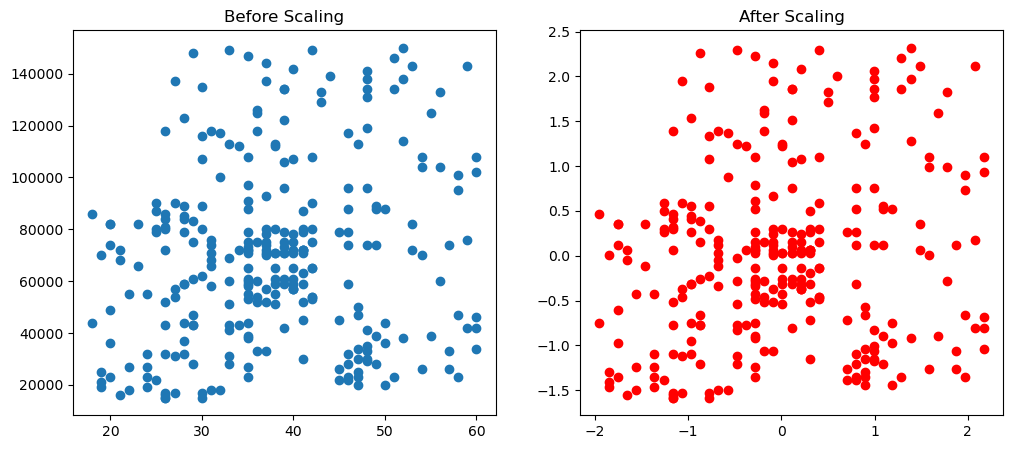

In [130]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(X_train['Age'], X_train['EstimatedSalary'])
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['Age'], X_train_scaled['EstimatedSalary'],color='red')
ax2.set_title("After Scaling")
plt.show()

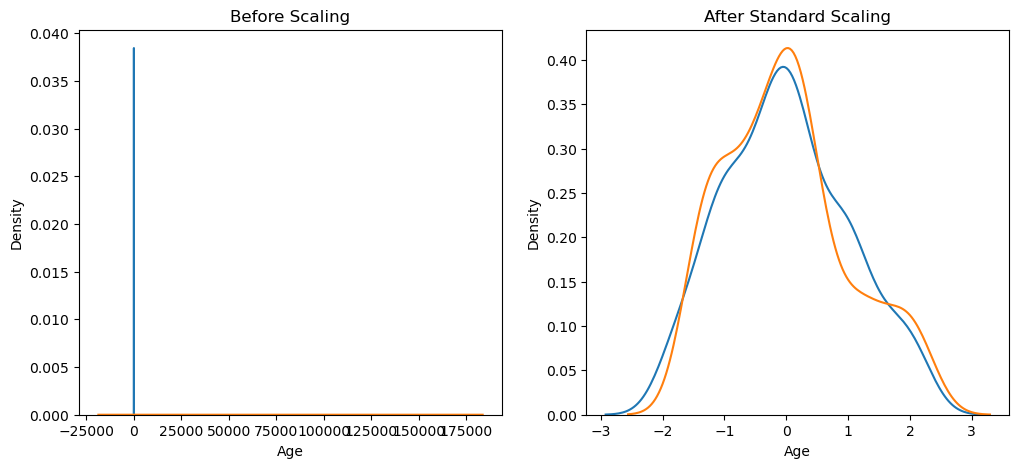

In [131]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Age'], ax=ax1)
sns.kdeplot(X_train['EstimatedSalary'], ax=ax1)

# after scaling
ax2.set_title('After Standard Scaling')
sns.kdeplot(X_train_scaled['Age'], ax=ax2)
sns.kdeplot(X_train_scaled['EstimatedSalary'], ax=ax2)
plt.show()

# Dataset havenot any outlier so i add manually Outlier :  Data Manipulation


In [132]:
df = df.append(pd.DataFrame({'Age':[5,90,95],'EstimatedSalary':[1000,250000,350000],'Purchased':[0,1,1]}),ignore_index=True)


C:\Users\Waqas\AppData\Local\Temp\ipykernel_6360\1232054125.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame({'Age':[5,90,95],'EstimatedSalary':[1000,250000,350000],'Purchased':[0,1,1]}),ignore_index=True)


# Data Preprocessing : handle the outlier


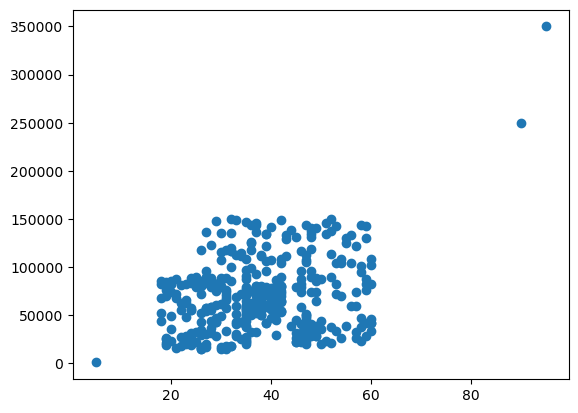

In [133]:
plt.scatter(df['Age'], df['EstimatedSalary'])


C:\Users\Waqas\AppData\Local\Temp\ipykernel_6360\3496536786.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'])
C:\Users\Waqas\AppData\Local\Temp\ipykernel_6360\3496536786.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['EstimatedSalary'])


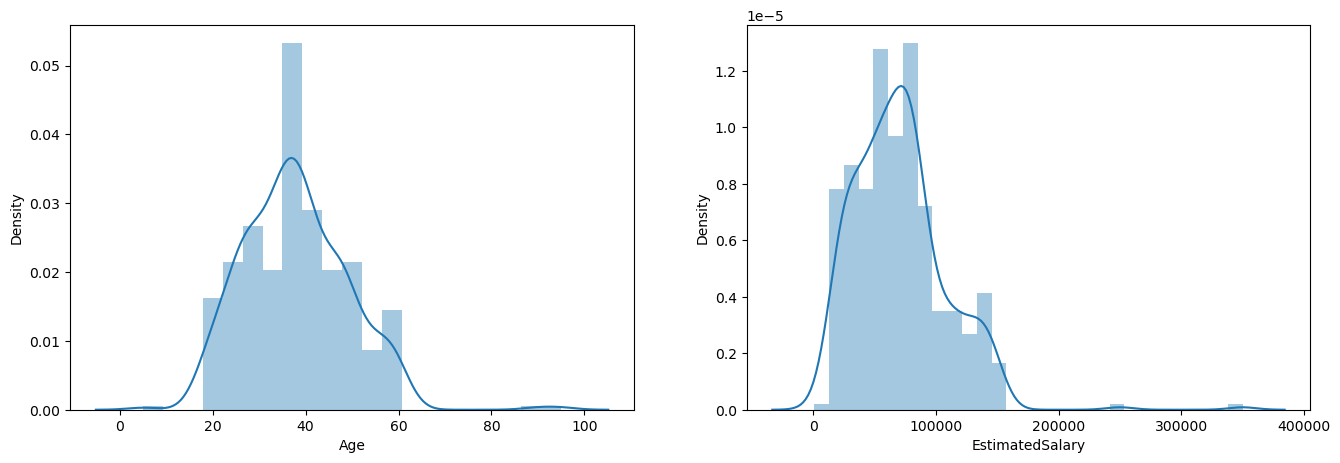

In [134]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['Age'])

plt.subplot(1,2,2)
sns.distplot(df['EstimatedSalary'])

plt.show()

# Now, find the outlier using boxplot

<Axes: >

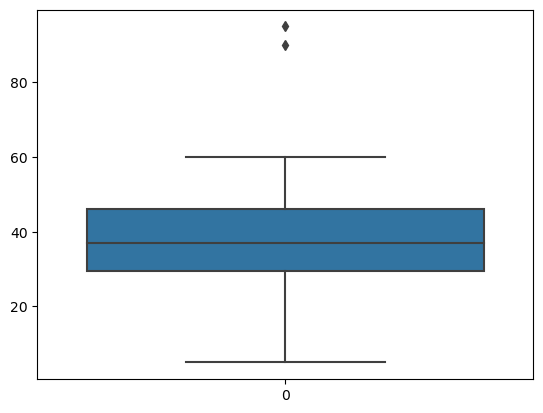

In [135]:
sns.boxplot(df['Age'])


<Axes: >

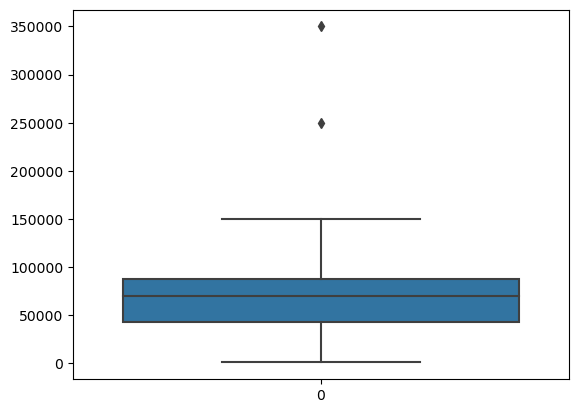

In [136]:
sns.boxplot(df['EstimatedSalary'])


# Now using IQR method for removing outlier

In [137]:
# Finding the IQR
percentile25 = df['Age'].quantile(0.25)
percentile75 = df['Age'].quantile(0.75)

In [138]:
percentile75


46.0

In [139]:
iqr = percentile75 - percentile25


In [140]:
iqr

16.5

In [141]:
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

In [142]:
print("Upper limit",upper_limit)
print("Lower limit",lower_limit)

Upper limit 70.75
Lower limit 4.75


In [143]:
df[df['Age'] > upper_limit]


,Age,EstimatedSalary,Purchased
401,90,250000,1
402,95,350000,1


In [144]:
df[df['Age'] < lower_limit]


,Age,EstimatedSalary,Purchased


# now use capping method for removeing outlier


In [145]:
new_df_cap = df.copy()

new_df_cap['Age'] = np.where(
    new_df_cap['Age'] > upper_limit,
    upper_limit,
    np.where(
        new_df_cap['Age'] < lower_limit,
        lower_limit,
        new_df_cap['Age']
    )
) 

In [146]:
new_df_cap.shape


(403, 3)

# outlier vs remove outlier 

C:\Users\Waqas\AppData\Local\Temp\ipykernel_6360\3454056293.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'])
C:\Users\Waqas\AppData\Local\Temp\ipykernel_6360\3454056293.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df_cap['Age'])


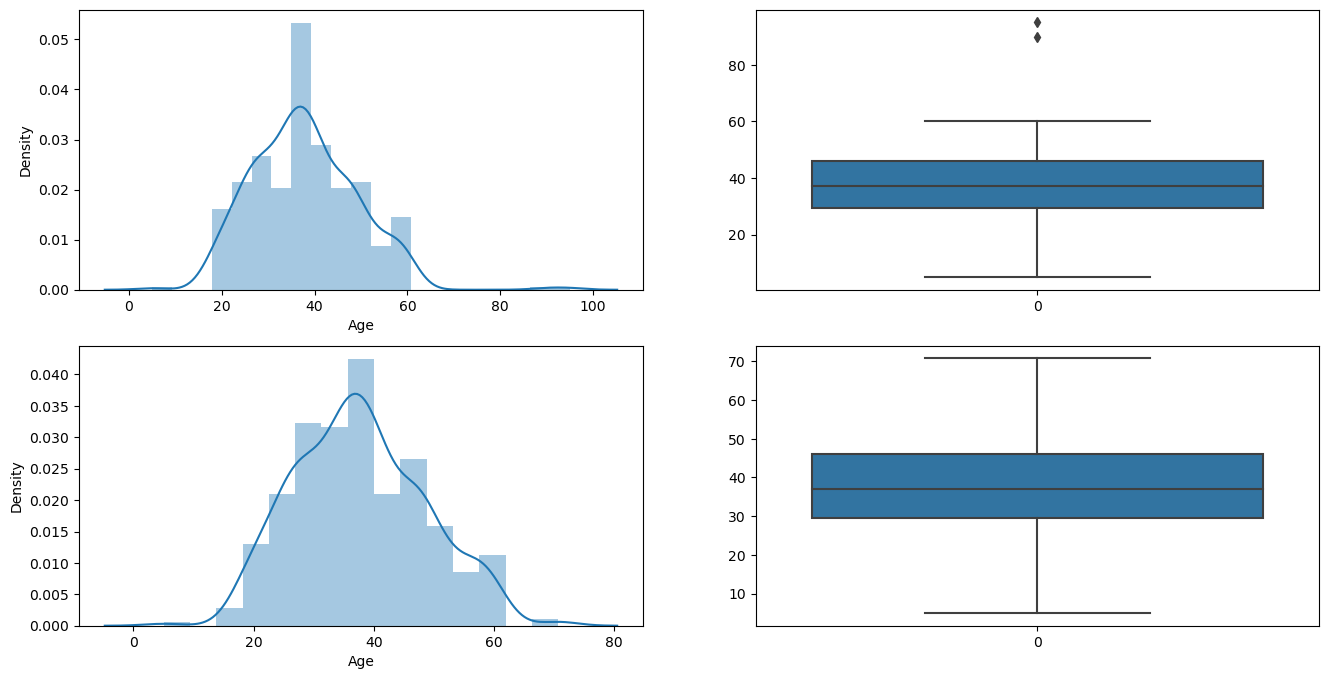

In [147]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['Age'])

plt.subplot(2,2,2)
sns.boxplot(df['Age'])

plt.subplot(2,2,3)
sns.distplot(new_df_cap['Age'])

plt.subplot(2,2,4)
sns.boxplot(new_df_cap['Age'])

plt.show()


# one hot encoding

In [148]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

from sklearn.compose import ColumnTransformer

from sklearn.model_selection import train_test_split

dataset=dataset.iloc[:,1:]

X_train1,X_test1,y_train1,y_test1 = train_test_split(dataset.drop(columns=['Purchased']),dataset['Purchased'],
                                                test_size=0.2)

In [149]:
dataset.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [150]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(drop='first',sparse=False,dtype=np.int32)
X_train_new = ohe.fit_transform(X_train1[['Gender']])
X_test_new = ohe.transform(X_test1[['Gender']])
X_train_new.shape

C:\Users\Waqas\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


(320, 1)

In [151]:
dataset=pd.get_dummies(dataset).sample(5)


#  Data Preprocessing : Calculate feature correlations in your data

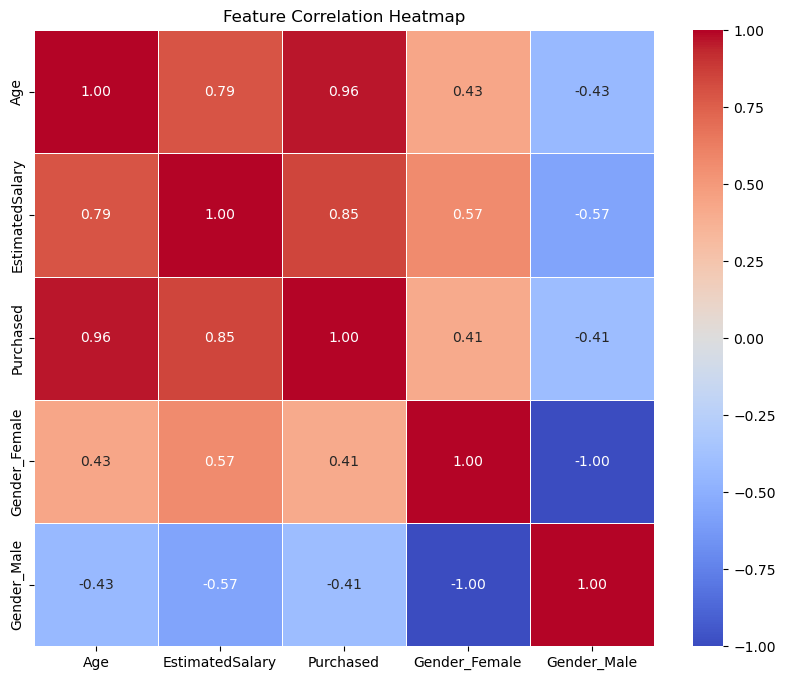

In [152]:
import seaborn as sns
import matplotlib.pyplot as plt


correlation_matrix = dataset.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Feature Correlation Heatmap')
plt.show()


In [153]:
dataset.head()

,Age,EstimatedSalary,Purchased,Gender_Female,Gender_Male
8,25,33000,0,0,1
39,27,31000,0,1,0
307,47,113000,1,1,0
204,58,101000,1,1,0
10,26,80000,0,1,0


# Data Preprocessing feature selection technique Tree-based Feature Selection

In [154]:
from sklearn.ensemble import RandomForestClassifier

# Assuming your data is in a pandas DataFrame named 'df'
X = dataset[['Age', 'EstimatedSalary', 'Gender_Female', 'Gender_Male']]
y = dataset['Purchased']

# Initialize the RandomForestClassifier
rf_model = RandomForestClassifier()

# Fit the model to your data
rf_model.fit(X, y)

# Get feature importances
feature_importances = rf_model.feature_importances_

# Print or visualize the feature importances
for feature, importance in zip(X.columns, feature_importances):
    print(f'{feature}: {importance}')


Age: 0.5109020310633214
EstimatedSalary: 0.4361559139784947
Gender_Female: 0.03927718040621267
Gender_Male: 0.013664874551971318


#  Data distributions

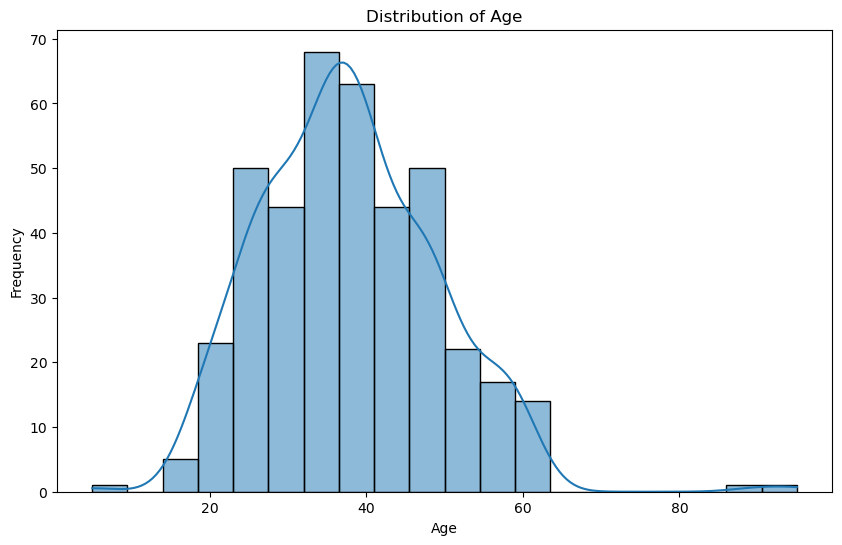

In [155]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


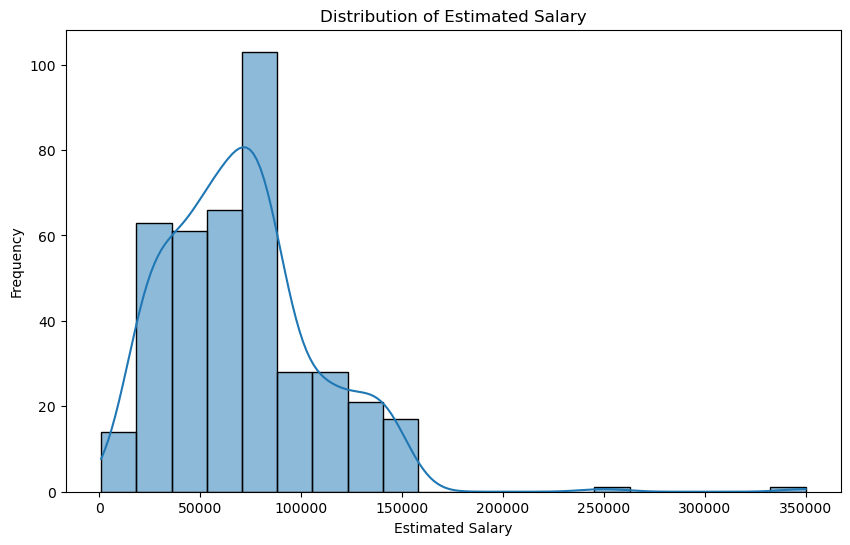

In [156]:
plt.figure(figsize=(10, 6))
sns.histplot(df['EstimatedSalary'], bins=20, kde=True)
plt.title('Distribution of Estimated Salary')
plt.xlabel('Estimated Salary')
plt.ylabel('Frequency')
plt.show()

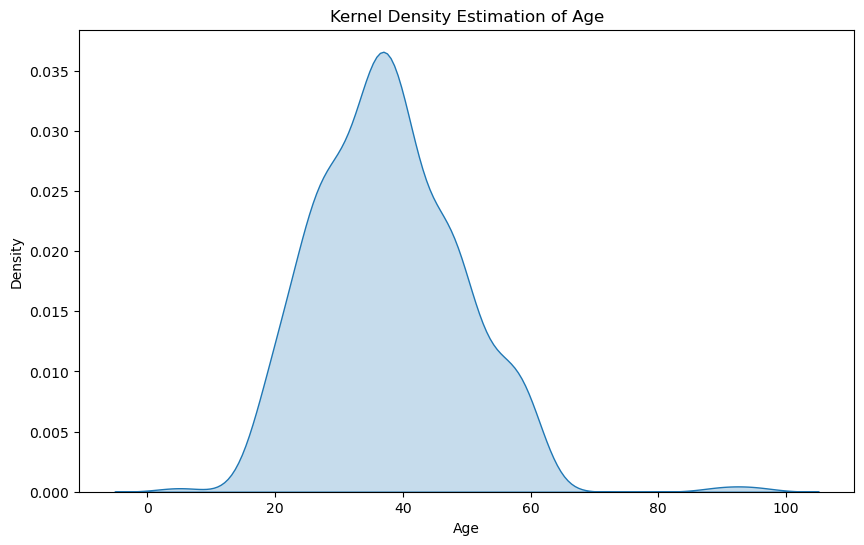

In [157]:
plt.figure(figsize=(10, 6))
sns.kdeplot(df['Age'], fill=True)
plt.title('Kernel Density Estimation of Age')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()


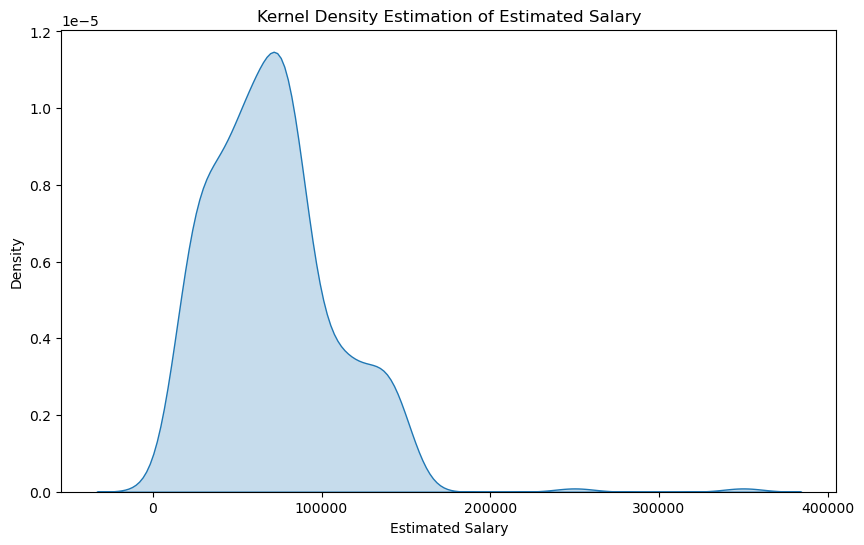

In [158]:
plt.figure(figsize=(10, 6))
sns.kdeplot(df['EstimatedSalary'], fill=True)
plt.title('Kernel Density Estimation of Estimated Salary')
plt.xlabel('Estimated Salary')
plt.ylabel('Density')
plt.show()


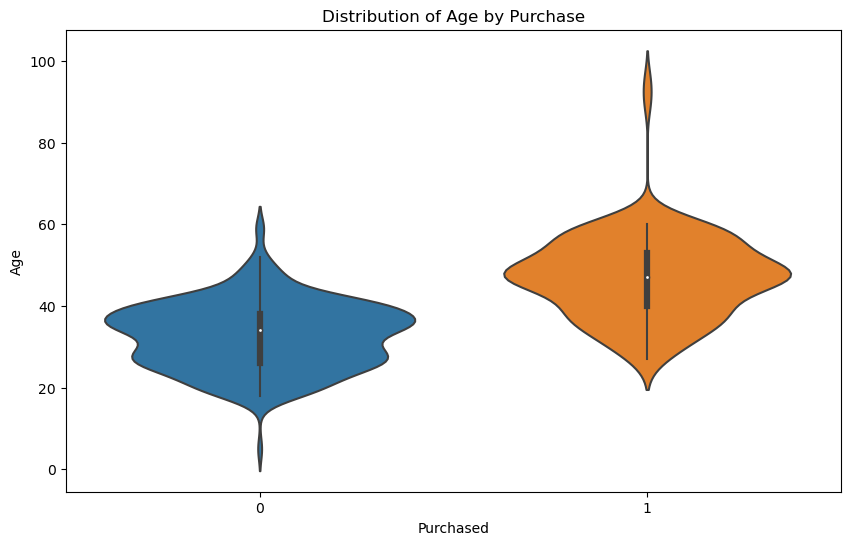

In [159]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Purchased', y='Age', data=df)
plt.title('Distribution of Age by Purchase')
plt.xlabel('Purchased')
plt.ylabel('Age')
plt.show()



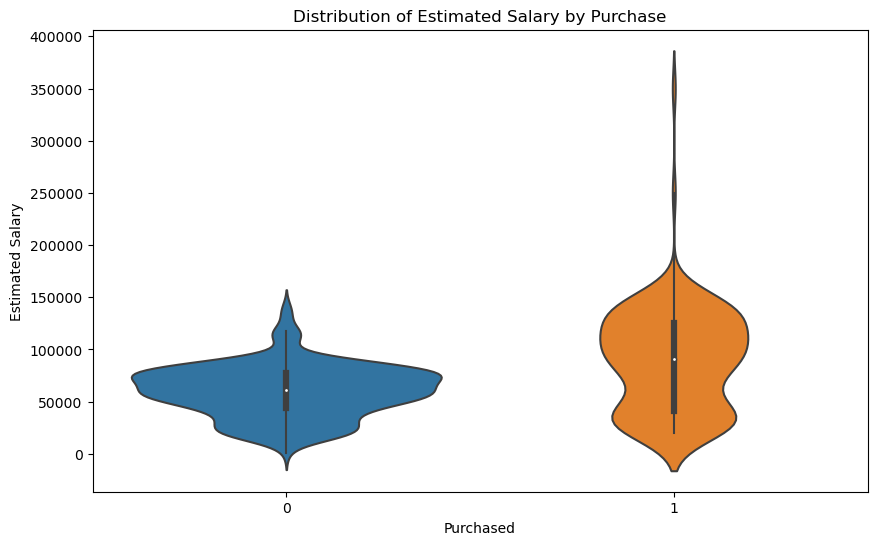

In [160]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Purchased', y='EstimatedSalary', data=df)
plt.title('Distribution of Estimated Salary by Purchase')
plt.xlabel('Purchased')
plt.ylabel('Estimated Salary')
plt.show()


In [161]:
dataset.head()

,Age,EstimatedSalary,Purchased,Gender_Female,Gender_Male
8,25,33000,0,0,1
39,27,31000,0,1,0
307,47,113000,1,1,0
204,58,101000,1,1,0
10,26,80000,0,1,0


# Data imbalance

In [162]:
#from imblearn.over_sampling import SMOTE
#from sklearn.model_selection import train_test_split
#from sklearn.ensemble import RandomForestClassifier
#from sklearn.metrics import accuracy_score, classification_report

# Assuming your dataset is stored in a pandas DataFrame named 'data'
#X = dataset[['Age', 'EstimatedSalary', 'Gender_Female', 'Gender_Male']]
#y = dataset['Purchased']


# Split the data into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to the training set
#smote = SMOTE(random_state=42)
#X_resample, y_resampled = SMOTE().fit_resample(X_train, y_train)

#X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Train a model on the resampled data
#model = RandomForestClassifier(random_state=42)
#model.fit(X_resampled, y_resampled)

# Make predictions on the test set
#y_pred = model.predict(X_test)

# Evaluate the model
#print("Accuracy:", accuracy_score(y_test, y_pred))
#print("Classification Report:\n", classification_report(y_test, y_pred))


# Data Preprocessing  standard Scaler

# Machine Learning algorithms

In [164]:
# Comparing how the different classification algorithms will perform
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

logistic_classifier = LogisticRegression()
decision_classifier = DecisionTreeClassifier()
svm_classifier = SVC()
naive_classifier = GaussianNB()

# Using these classifiers to fit our data, X_train and y_train
logistic_classifier.fit(X_train_scaled, y_train)
decision_classifier.fit(X_train_scaled, y_train)
svm_classifier.fit(X_train_scaled, y_train)
naive_classifier.fit(X_train_scaled, y_train)

GaussianNB()

In [165]:
logistic_y_prediction = logistic_classifier.predict(X_test_scaled)
decision_y_prediction = decision_classifier.predict(X_test_scaled)
svm_y_prediction = svm_classifier.predict(X_test_scaled)
naive_y_prediction = naive_classifier.predict(X_test_scaled)
# Printing the evaluation metrics to determine the accuracy of classifiers
from sklearn.metrics import classification_report, accuracy_score

print("accuracy_score logistics", accuracy_score(logistic_y_prediction, y_test))
print("accuracy_score Decision Tree Classifier", accuracy_score(decision_y_prediction, y_test))
print("accuracy_score SVC ", accuracy_score(svm_y_prediction, y_test))
print("accuracy_score naive_classifier", accuracy_score(naive_y_prediction, y_test))

accuracy_score logistics 0.8666666666666667
accuracy_score Decision Tree Classifier 0.8666666666666667
accuracy_score SVC  0.9083333333333333
accuracy_score naive_classifier 0.8916666666666667


In [166]:
print('Logistic classifier:')
print(classification_report(y_test, logistic_y_prediction))

print('Decision Tree classifier:')
print(classification_report(y_test, decision_y_prediction))

print('SVM Classifier:')
print(classification_report(y_test, svm_y_prediction))


print('Naive Bayes Classifier:')
print(classification_report(y_test, naive_y_prediction))

Logistic classifier:
              precision    recall  f1-score   support

           0       0.87      0.94      0.90        79
           1       0.86      0.73      0.79        41

    accuracy                           0.87       120
   macro avg       0.86      0.83      0.85       120
weighted avg       0.87      0.87      0.86       120

Decision Tree classifier:
              precision    recall  f1-score   support

           0       0.91      0.89      0.90        79
           1       0.79      0.83      0.81        41

    accuracy                           0.87       120
   macro avg       0.85      0.86      0.85       120
weighted avg       0.87      0.87      0.87       120

SVM Classifier:
              precision    recall  f1-score   support

           0       0.95      0.91      0.93        79
           1       0.84      0.90      0.87        41

    accuracy                           0.91       120
   macro avg       0.89      0.91      0.90       120
weighted av

In [167]:
from sklearn.metrics import confusion_matrix

print('Logistic Regression classifier:')
print(confusion_matrix(logistic_y_prediction, y_test))

print('Decision Tree classifier:')
print(confusion_matrix(decision_y_prediction, y_test))


print('SVM classifier:')
print(confusion_matrix(svm_y_prediction, y_test))

print('Naive Bayes classifier:')
print(confusion_matrix(naive_y_prediction, y_test))

Logistic Regression classifier:
[[74 11]
 [ 5 30]]
Decision Tree classifier:
[[70  7]
 [ 9 34]]
SVM classifier:
[[72  4]
 [ 7 37]]
Naive Bayes classifier:
[[74  8]
 [ 5 33]]


# Scaling is important?

In [193]:
lr = LogisticRegression()
lr_scaled = LogisticRegression()
lr.fit(X_train,y_train)
lr_scaled.fit(X_train_scaled,y_train)

LogisticRegression()

In [194]:
y_pred = lr.predict(X_test)
y_pred_scaled = lr_scaled.predict(X_test_scaled)

In [195]:
print("Actual LogisticRegression",accuracy_score(y_test,y_pred))
print("Scaled LogisticRegression",accuracy_score(y_test,y_pred_scaled))

Actual LogisticRegression 0.6583333333333333
Scaled LogisticRegression 0.8666666666666667


In [196]:
dt = DecisionTreeClassifier()
dt_scaled = DecisionTreeClassifier()
dt.fit(X_train,y_train)
dt_scaled.fit(X_train_scaled,y_train)
y_pred = dt.predict(X_test)
y_pred_scaled = dt_scaled.predict(X_test_scaled)
print("Actual DecisionTreeClassifier",accuracy_score(y_test,y_pred))
print("Scaled DecisionTreeClassifier",accuracy_score(y_test,y_pred_scaled))

Actual DecisionTreeClassifier 0.875
Scaled DecisionTreeClassifier 0.875


# prediction with new dataset

In [171]:
# Making a new prediction & comparing results
new_case = [[ 16, 300]] 

# We will need to transform our new case
new_case = norm.transform(new_case)

print('Logistic Regression classifier', logistic_classifier.predict(new_case))
print('Decision Tree classifier:', decision_classifier.predict(new_case))
print('SVM classifier:', svm_classifier.predict(new_case))
print('Naive Bayes classifier:', naive_classifier.predict(new_case))

Logistic Regression classifier [0]
Decision Tree classifier: [0]
SVM classifier: [0]
Naive Bayes classifier: [0]


C:\Users\Waqas\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\Waqas\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\Waqas\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\Waqas\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\Waqas\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


# Evaluation of ML algorithms

In [184]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
y_pred = logistic_classifier.predict(X_test_scaled)
y_pred1 = decision_classifier.predict(X_test_scaled)
y_pred2 = svm_classifier.predict(X_test_scaled)
y_pred3 = naive_classifier.predict(X_test_scaled)


In [185]:
y_test.values


array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 1], dtype=int64)

In [186]:
print("MAE of logistic_classifier",mean_absolute_error(y_test,y_pred))
print("MAE of decision_classifier",mean_absolute_error(y_test,y_pred1))
print("MAE of svm_classifier",mean_absolute_error(y_test,y_pred2))
print("MAE of naive_classifier",mean_absolute_error(y_test,y_pred3))

MAE of logistic_classifier 0.13333333333333333
MAE of decision_classifier 0.13333333333333333
MAE of svm_classifier 0.09166666666666666
MAE of naive_classifier 0.10833333333333334


In [187]:
print("MSE of logistic_classifier",mean_squared_error(y_test,y_pred))
print("MSE of decision_classifier",mean_squared_error(y_test,y_pred1))
print("MSE of svm_classifier",mean_squared_error(y_test,y_pred2))
print("MSE of naive_classifier",mean_squared_error(y_test,y_pred3))


MSE of logistic_classifier 0.13333333333333333
MSE of decision_classifier 0.13333333333333333
MSE of svm_classifier 0.09166666666666666
MSE of naive_classifier 0.10833333333333334


In [188]:
print("RMSE of logistic_classifier ",np.sqrt(mean_squared_error(y_test,y_pred)))
print("RMSE of decision_classifier",np.sqrt(mean_squared_error(y_test,y_pred1)))
print("RMSE of svm_classifier",np.sqrt(mean_squared_error(y_test,y_pred2)))
print("RMSE of naive_classifier",np.sqrt(mean_squared_error(y_test,y_pred3)))


RMSE of logistic_classifier  0.3651483716701107
RMSE of decision_classifier 0.3651483716701107
RMSE of svm_classifier 0.30276503540974914
RMSE of naive_classifier 0.32914029430219166


In [189]:
print("r2_score of logistic_classifier",r2_score(y_test,y_pred))
print("r2_score of decision_classifier",r2_score(y_test,y_pred1))
print("r2_score of svm_classifier",r2_score(y_test,y_pred2))
print("r2_score of naive_classifier",r2_score(y_test,y_pred3))


r2_score of logistic_classifier 0.40722445199135526
r2_score of decision_classifier 0.40722445199135526
r2_score of svm_classifier 0.5924668107440567
r2_score of naive_classifier 0.5183698672429762
